## First, install the package

Run ```pip install -e .``` at the proj root directory

## Pretrain the model on serveral datasets under inductive setting. 
```
bash scripts/run_small_dataset.sh $GPU_NUMBER
```

GPU_NUMBER is the index of GPU to use. For example, ```bash scripts/run_small_dataset.sh 3``` means using GPU 3 to train the models.


## Perform the edit on pretrained model.

```
bash scripts/eval.sh $GPU_NUMBER
```

## Load saved results for visualization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import os

font_config = {'font.size': 14, 'font.family': 'Times New Roman'}
plt.rcParams.update(font_config)
plt.rcParams["figure.figsize"] = (6.4, 3.2)

datasets = ['cora', 'flickr', 'reddit2', 'arxiv']
models = ['GCN_MLP', 'SAGE_MLP']
ROOT = '/home/zl105/edit_gnn/finetune_attack'

summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for model in models:
        file_name = f'{ROOT}/{dataset}/GD/{model}_eval.json'
        with open(file_name, 'r') as f:
            summary[dataset][model] = json.load(f)
# print(summary)

In [2]:
fig = plt.figure()
num_datasets = len(datasets)

edit_way = 'ind_edit' # seq_edit, ind_edit, batch_edit
metric = 'cs_test_drawdown' ### val_drawdown, test_drawdown

gathered_data = []
for idx, model in enumerate(models):    
    data = [summary[dataset][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)

<Figure size 640x320 with 0 Axes>

In [3]:
for idx, model in enumerate(models):
    for idx_j, dataset in enumerate(datasets):
        print(model, dataset, 'bef_edit_tst_acc', summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100)
        print(model, dataset, 'after_edit_tst_acc', summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100 - gathered_data[idx][idx_j])
        print(model, dataset, metric, gathered_data[idx][idx_j])

GCN_MLP cora bef_edit_tst_acc 89.4
GCN_MLP cora after_edit_tst_acc 92.8848484848485
GCN_MLP cora cs_test_drawdown -3.4848484848485017
GCN_MLP flickr bef_edit_tst_acc 51.279523147940665
GCN_MLP flickr after_edit_tst_acc 86.90791287811533
GCN_MLP flickr cs_test_drawdown -35.62838973017466
GCN_MLP reddit2 bef_edit_tst_acc 85.04897531355043
GCN_MLP reddit2 after_edit_tst_acc 86.13900493110886
GCN_MLP reddit2 cs_test_drawdown -1.09002961755843
GCN_MLP arxiv bef_edit_tst_acc 69.76524082875542
GCN_MLP arxiv after_edit_tst_acc 96.20796262031443
GCN_MLP arxiv cs_test_drawdown -26.44272179155901
SAGE_MLP cora bef_edit_tst_acc 87.6
SAGE_MLP cora after_edit_tst_acc 91.76666666666667
SAGE_MLP cora cs_test_drawdown -4.166666666666674
SAGE_MLP flickr bef_edit_tst_acc 49.49132792542464
SAGE_MLP flickr after_edit_tst_acc 73.36630396475397
SAGE_MLP flickr cs_test_drawdown -23.874976039329326
SAGE_MLP reddit2 bef_edit_tst_acc 96.4940181443597
SAGE_MLP reddit2 after_edit_tst_acc 96.51563545150842
SAGE_MLP

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


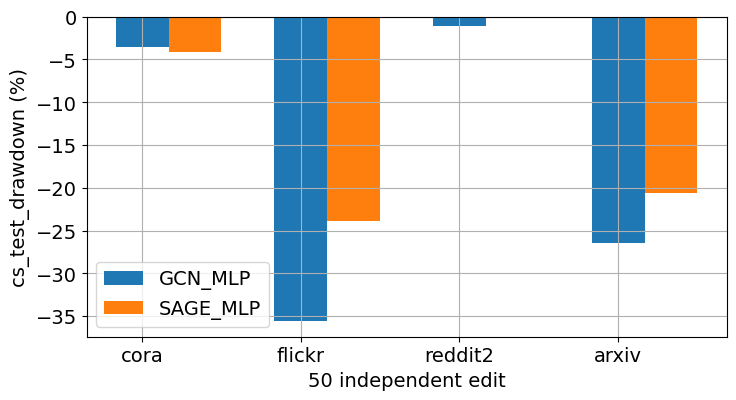

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
step_size = 1. / (len(models)+1) 
X = np.arange(num_datasets)

title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
for i in range(len(models)):
    ax.bar(X + step_size * i, gathered_data[i], width = step_size)

ax.set_xticks(X + np.floor((len(models)-1)/2)* step_size)
ax.set_xticklabels(datasets)
# ax.set_yticks(np.arange(0., 50., 5.))
ax.set_ylabel(f'{metric} (%)')
ax.set_xlabel(f'{title_mapping[edit_way]}')
ax.grid()
ax.legend(models)


In [4]:
len(gathered_data)

5